# create new python environment

```bash
mamba create -n fractal-env python=3.11 -y

# initialize 
mamba init

# close terminal
```

```bash
mamba activate fractal-env

mamba install numpy matplotlib numba pytorch torchvision torchaudio cudatoolkit=11.8 -c pytorch -c nvidia
```

```bash
python -m ipykernel install --name fractal-env --display-name "Fractal Env"
```

To get started with generating fractals and displaying them using Three.js in a browser, we can break down the task into two main parts:

1. **Generating Fractals in Python**: We'll use scientific Python libraries such as NumPy and Matplotlib to create fractal patterns.
2. **Displaying Fractals with Three.js**: We'll convert the generated data into a format that Three.js can use to render the fractals in a browser.

Let's start with the Python part. We'll write code to generate examples of self-similar and self-affine fractals in 1D, 2D, and 3D.

### 1D Fractals

**Example: Cantor Set**


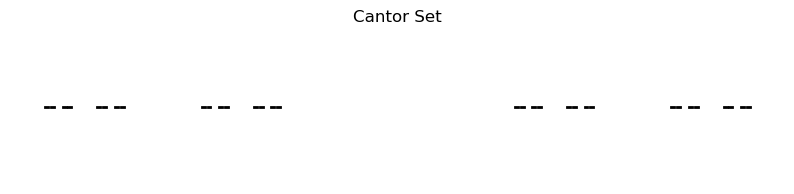

In [1]:
import matplotlib.pyplot as plt

def cantor_set(ax, x, y, length, depth):
    if depth == 0:
        ax.plot([x, x + length], [y, y], color='black', lw=2)
    else:
        length /= 3
        cantor_set(ax, x, y, length, depth-1)
        cantor_set(ax, x + 2 * length, y, length, depth-1)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Cantor Set')
ax.set_axis_off()
cantor_set(ax, 0, 0, 27, 5)
plt.show()


### 2D Fractals

**Example: Sierpinski Triangle**

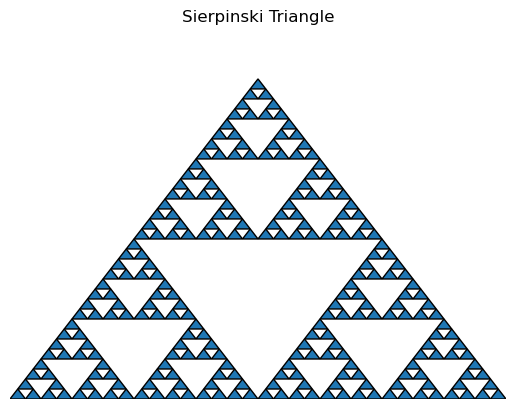

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(ax, vertices, depth):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor='black')
        ax.add_patch(triangle)
    else:
        midpoints = [(vertices[i] + vertices[(i + 1) % 3]) / 2 for i in range(3)]
        sierpinski_triangle(ax, [vertices[0], midpoints[0], midpoints[2]], depth-1)
        sierpinski_triangle(ax, [vertices[1], midpoints[1], midpoints[0]], depth-1)
        sierpinski_triangle(ax, [vertices[2], midpoints[2], midpoints[1]], depth-1)

fig, ax = plt.subplots()
ax.set_title('Sierpinski Triangle')
ax.set_axis_off()
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])
sierpinski_triangle(ax, vertices, 5)
plt.show()


### 3D Fractals

**Example: Menger Sponge**

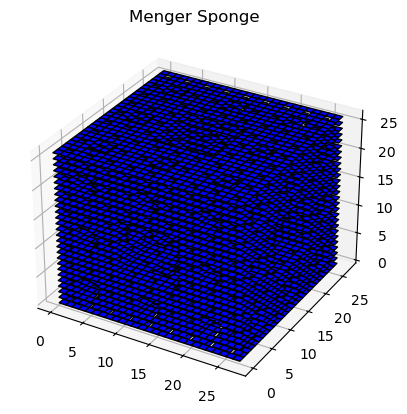

In [3]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

def menger_sponge(ax, x, y, z, size, depth):
    if depth == 0:
        r = [[x, y, z], [x + size, y, z], [x + size, y + size, z], [x, y + size, z]]
        ax.add_collection3d(Poly3DCollection([r], facecolors='blue', linewidths=1, edgecolors='black'))
    else:
        size /= 3
        for dx in [0, 1, 2]:
            for dy in [0, 1, 2]:
                for dz in [0, 1, 2]:
                    if (dx == 1 and dy == 1) or (dx == 1 and dz == 1) or (dy == 1 and dz == 1):
                        continue
                    menger_sponge(ax, x + dx * size, y + dy * size, z + dz * size, size, depth - 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Menger Sponge')
menger_sponge(ax, 0, 0, 0, 27, 3)
plt.show()


### Converting to Three.js

We can convert the fractal data into a format that Three.js can render. For instance, we'll export the vertex positions and faces for the 3D Menger Sponge.

Here's a simple example of how you might export data for use in Three.js:


In [4]:
import json

def generate_menger_sponge_data(x, y, z, size, depth):
    vertices = []
    faces = []
    # Define a function to recursively add vertices and faces
    # ...
    # Return vertices and faces as lists
    return vertices, faces

vertices, faces = generate_menger_sponge_data(0, 0, 0, 27, 3)

with open('menger_sponge.json', 'w') as f:
    json.dump({'vertices': vertices, 'faces': faces}, f)


### Displaying with Three.js

In your HTML file, you would load this JSON data and use Three.js to render it:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Menger Sponge</title>
    <style>
        body { margin: 0; }
        canvas { display: block; }
    </style>
</head>
<body>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/three.js/r128/three.min.js"></script>
    <script>
        let scene = new THREE.Scene();
        let camera = new THREE.PerspectiveCamera(75, window.innerWidth / window.innerHeight, 0.1, 1000);
        let renderer = new THREE.WebGLRenderer();
        renderer.setSize(window.innerWidth, window.innerHeight);
        document.body.appendChild(renderer.domElement);

        fetch('menger_sponge.json')
            .then(response => response.json())
            .then(data => {
                let geometry = new THREE.Geometry();
                data.vertices.forEach(v => geometry.vertices.push(new THREE.Vector3(v[0], v[1], v[2])));
                data.faces.forEach(f => geometry.faces.push(new THREE.Face3(f[0], f[1], f[2])));
                let material = new THREE.MeshBasicMaterial({ color: 0x00ff00, wireframe: true });
                let mesh = new THREE.Mesh(geometry, material);
                scene.add(mesh);

                camera.position.z = 50;
                let animate = function () {
                    requestAnimationFrame(animate);
                    mesh.rotation.x += 0.01;
                    mesh.rotation.y += 0.01;
                    renderer.render(scene, camera);
                };
                animate();
            });
    </script>
</body>
</html>
```

With these examples, you should be able to generate fractal data in Python and display it using Three.js. Feel free to modify and expand these examples based on your specific needs

### 1D Self-Affine Fractal: Fractional Brownian Motion

Fractional Brownian motion (fBm) is a generalization of Brownian motion and can be used to create self-affine fractals.


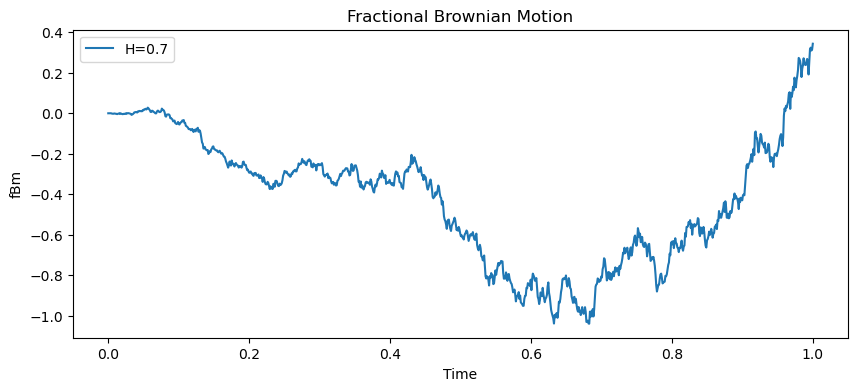

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fractional_brownian_motion(H, length, n):
    dt = length / n
    t = np.linspace(0, length, n)
    dB = np.random.normal(0, np.sqrt(dt), n)
    B = np.cumsum(dB)
    fBm = t ** H * B
    return t, fBm

H = 0.7  # Hurst exponent
length = 1.0
n = 1000
t, fBm = fractional_brownian_motion(H, length, n)

plt.figure(figsize=(10, 4))
plt.plot(t, fBm, label=f'H={H}')
plt.title('Fractional Brownian Motion')
plt.xlabel('Time')
plt.ylabel('fBm')
plt.legend()
plt.show()

### 2D Self-Affine Fractal: Perlin Noise

Perlin noise is used to generate textures that are self-affine.

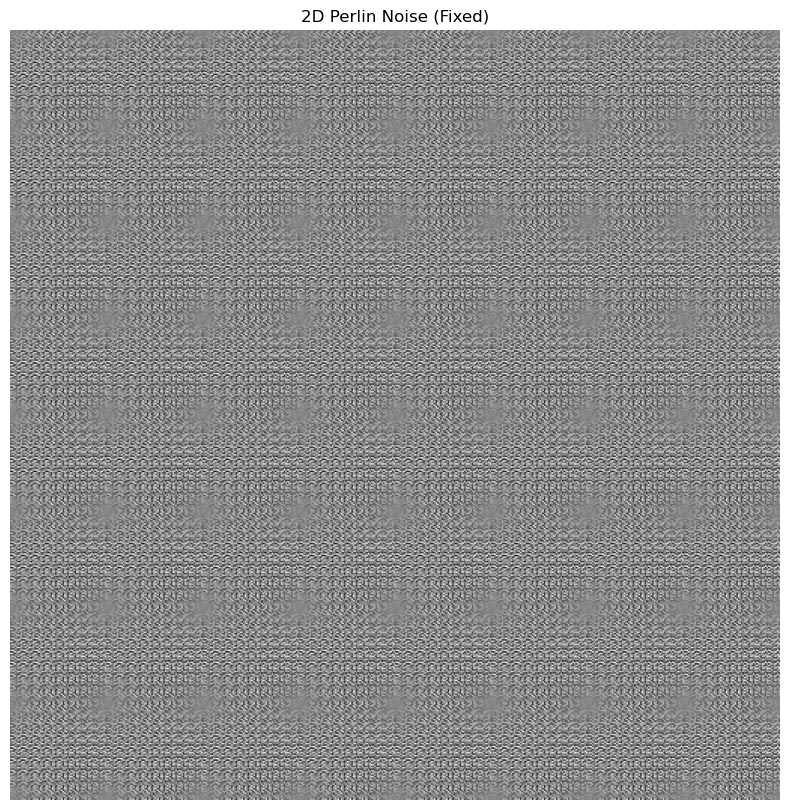

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_perlin_noise_2d(shape, res):
    """Generate 2D Perlin noise - FIXED VERSION."""
    def f(t):
        return 6 * t**5 - 15 * t**4 + 10 * t**3

    # Generate grid
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0], 0:res[1]:delta[1]]
    grid = grid.transpose(1, 2, 0) % 1

    # Generate random gradients
    angles = 2 * np.pi * np.random.rand(res[0] + 1, res[1] + 1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))

    # Tile gradients to match grid size - FIXED: use np.tile instead of .repeat()
    tile_x = shape[0] // res[0]
    tile_y = shape[1] // res[1]

    def get_gradients(slice_x, slice_y):
        # Extract gradient slice and tile it properly
        grad_slice = gradients[slice_x, slice_y]
        # Tile in both dimensions
        return np.tile(
            np.tile(grad_slice, (tile_x, 1, 1)),
            (1, tile_y, 1)
        )

    g00 = get_gradients(slice(0, res[0]), slice(0, res[1]))
    g10 = get_gradients(slice(1, res[0]+1), slice(0, res[1]))
    g01 = get_gradients(slice(0, res[0]), slice(1, res[1]+1))
    g11 = get_gradients(slice(1, res[0]+1), slice(1, res[1]+1))

    # Compute dot products
    n00 = np.sum(grid * g00, axis=2)
    n10 = np.sum(np.dstack((grid[:, :, 0] - 1, grid[:, :, 1])) * g10, axis=2)
    n01 = np.sum(np.dstack((grid[:, :, 0], grid[:, :, 1] - 1)) * g01, axis=2)
    n11 = np.sum((grid - 1) * g11, axis=2)

    # Interpolate
    t = f(grid)
    n0 = n00 * (1 - t[:, :, 0]) + t[:, :, 0] * n10
    n1 = n01 * (1 - t[:, :, 0]) + t[:, :, 0] * n11
    return np.sqrt(2) * ((1 - t[:, :, 1]) * n0 + t[:, :, 1] * n1)

shape = (512, 512)
res = (8, 8)
noise = generate_perlin_noise_2d(shape, res)

plt.figure(figsize=(10, 10))
plt.imshow(noise, cmap='gray')
plt.title('2D Perlin Noise (Fixed)')
plt.axis('off')
plt.show()

### 3D Self-Affine Fractal: 3D Fractional Brownian Motion

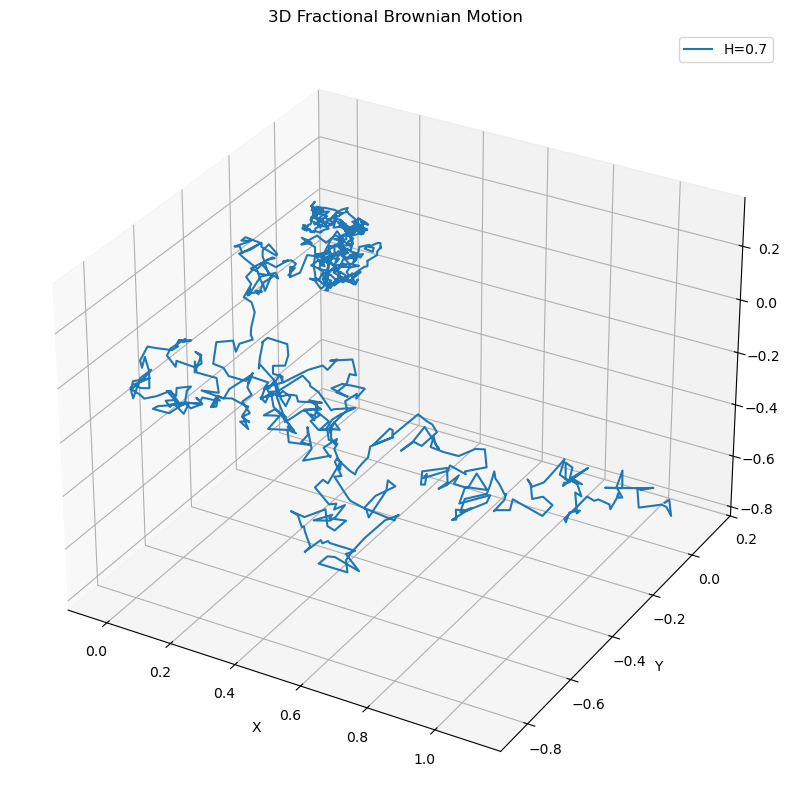

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fractional_brownian_motion_3d(H, length, n):
    dt = length / n
    t = np.linspace(0, length, n)
    dB = np.random.normal(0, np.sqrt(dt), (n, 3))
    B = np.cumsum(dB, axis=0)
    fBm = t[:, None] ** H * B
    return t, fBm

H = 0.7  # Hurst exponent
length = 1.0
n = 1000
t, fBm = fractional_brownian_motion_3d(H, length, n)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(fBm[:, 0], fBm[:, 1], fBm[:, 2], label=f'H={H}')
ax.set_title('3D Fractional Brownian Motion')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()


These examples provide a starting point for generating self-affine fractals in 1D, 2D, and 3D. You can expand and modify these examples based on your specific requirements and the details from the manuscript.

Python code to create self-affine branching patterns resembling a fern and a tree using Matplotlib. These patterns are generated using Iterated Function Systems (IFS).

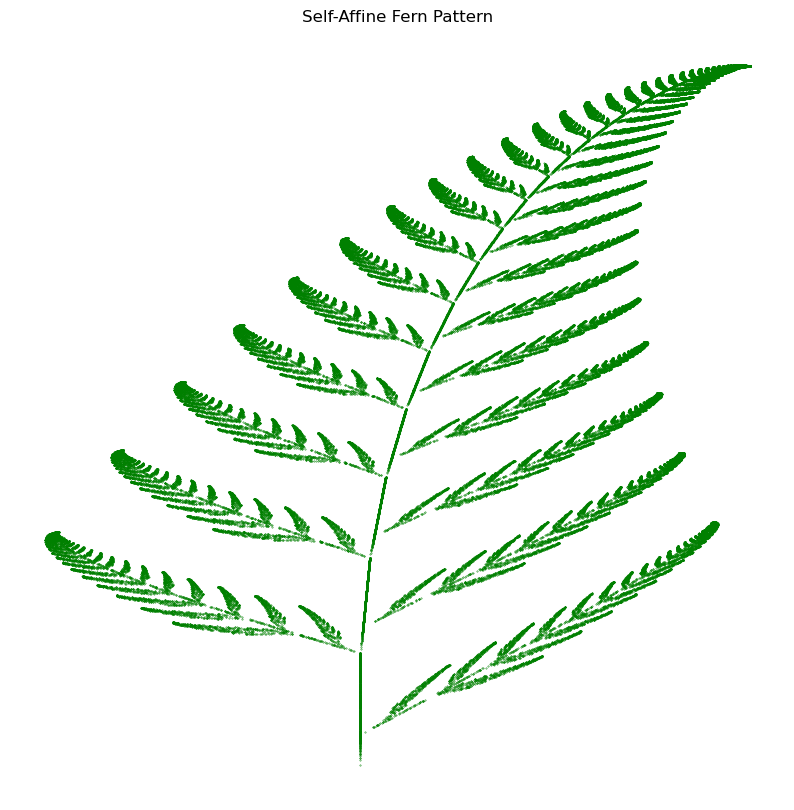

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def fern(n):
    x, y = [0], [0]
    for _ in range(n):
        r = np.random.random()
        if r < 0.01:
            x.append(0)
            y.append(0.16 * y[-1])
        elif r < 0.86:
            x.append(0.85 * x[-1] + 0.04 * y[-1])
            y.append(-0.04 * x[-1] + 0.85 * y[-1] + 1.6)
        elif r < 0.93:
            x.append(0.2 * x[-1] - 0.26 * y[-1])
            y.append(0.23 * x[-1] + 0.22 * y[-1] + 1.6)
        else:
            x.append(-0.15 * x[-1] + 0.28 * y[-1])
            y.append(0.26 * x[-1] + 0.24 * y[-1] + 0.44)
    return x, y

x, y = fern(100000)

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=0.1, color='green')
plt.title('Self-Affine Fern Pattern')
plt.axis('off')
plt.show()


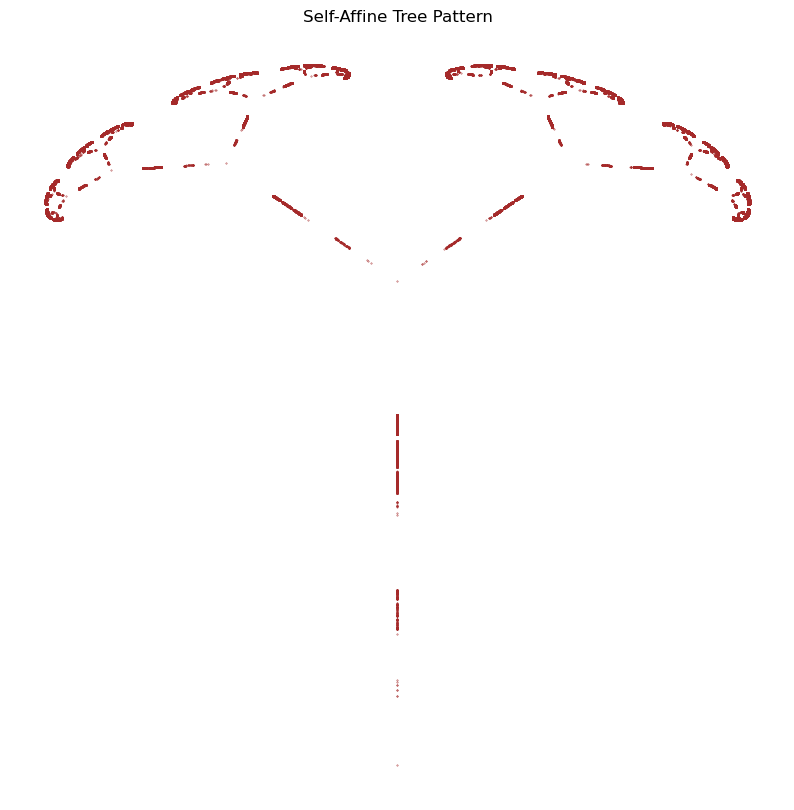

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def tree(n):
    x, y = [0], [0]
    for _ in range(n):
        r = np.random.random()
        if r < 0.05:
            x.append(0)
            y.append(0.5 * y[-1])
        elif r < 0.45:
            x.append(0.42 * x[-1] - 0.42 * y[-1])
            y.append(0.42 * x[-1] + 0.42 * y[-1] + 0.4)
        else:
            x.append(0.42 * x[-1] + 0.42 * y[-1])
            y.append(-0.42 * x[-1] + 0.42 * y[-1] + 0.4)
    return x, y

x, y = tree(100000)

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=0.1, color='brown')
plt.title('Self-Affine Tree Pattern')
plt.axis('off')
plt.show()


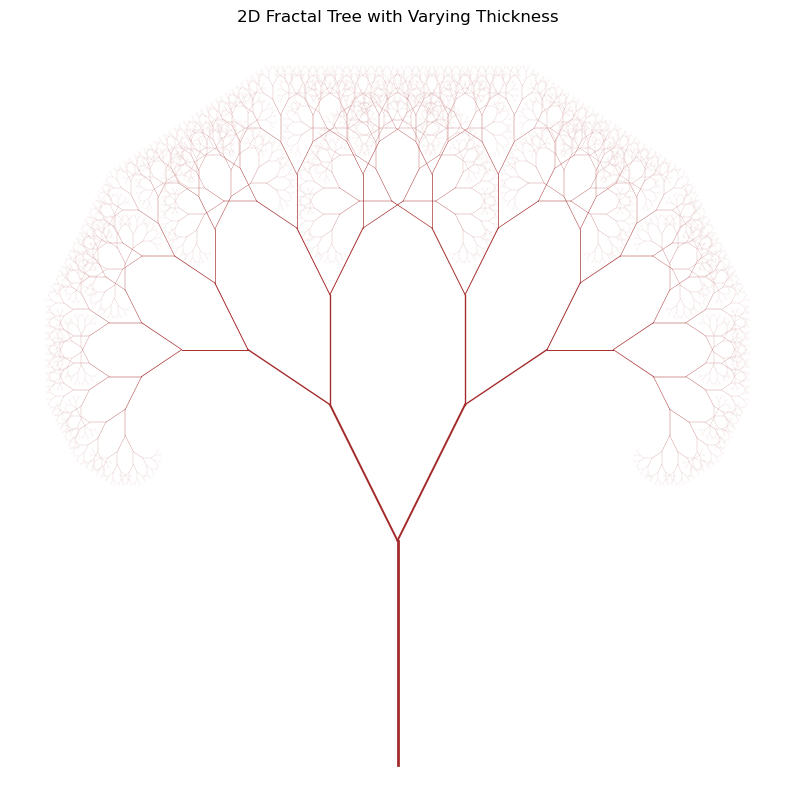

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def draw_branch(x, y, angle, length, thickness, ax):
    if length > 0.1:
        x_new = x + length * np.cos(angle)
        y_new = y + length * np.sin(angle)
        
        ax.plot([x, x_new], [y, y_new], color='brown', lw=thickness)
        
        new_length = length * 0.7
        new_thickness = thickness * 0.7
        
        draw_branch(x_new, y_new, angle + np.pi / 6, new_length, new_thickness, ax)
        draw_branch(x_new, y_new, angle - np.pi / 6, new_length, new_thickness, ax)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

draw_branch(0, 0, np.pi / 2, 10, 2, ax)

plt.title('2D Fractal Tree with Varying Thickness')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_branch(x, y, angle, length, thickness, splits, ax):
    if length > 0.1:
        x_new = x + length * np.cos(angle)
        y_new = y + length * np.sin(angle)
        
        ax.plot([x, x_new], [y, y_new], color='brown', lw=thickness)
        
        # Adjust new_length and new_thickness factors to vary branch length and thickness
        new_length = length * 0.7
        new_thickness = thickness * 0.7
        
        for i in range(splits):
            # Vary the angle of splits, for example between -np.pi/6 and np.pi/6
            new_angle = angle + np.pi * (i / (splits - 1) - 0.5) / 3
            draw_branch(x_new, y_new, new_angle, new_length, new_thickness, splits, ax)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

# Initial parameters: origin, initial angle, initial length, initial thickness, number of splits
draw_branch(0, 0, np.pi / 2, 10, 2, 4, ax)

plt.title('2D Fractal Tree with Varying Branches')
plt.show()


To leverage CUDA and parallel GPU threads for faster calculations in generating the fractal tree, we'll use the numba library, which supports CUDA for Python. Here's the updated code using numba for parallel computations:

Prerequisites
Ensure you have numba and numpy installed:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda, float32, int32

@cuda.jit
def draw_branch(x, y, angle, length, thickness, splits, d_x, d_y, d_thickness):
    idx = cuda.grid(1)
    if idx < x.size:
        x_new = x[idx] + length * np.cos(angle[idx])
        y_new = y[idx] + length * np.sin(angle[idx])
        
        new_length = length * 0.7
        new_thickness = thickness[idx] * 0.7
        
        for i in range(splits):
            new_angle = angle[idx] + np.pi * (i / (splits - 1) - 0.5) / 3
            d_x[idx, i] = x_new
            d_y[idx, i] = y_new
            d_thickness[idx, i] = new_thickness

def generate_tree(num_branches, splits):
    x = np.zeros(num_branches, dtype=np.float32)
    y = np.zeros(num_branches, dtype=np.float32)
    angle = np.ones(num_branches, dtype=np.float32) * (np.pi / 2)
    thickness = np.ones(num_branches, dtype=np.float32) * 2

    d_x = np.zeros((num_branches, splits), dtype=np.float32)
    d_y = np.zeros((num_branches, splits), dtype=np.float32)
    d_thickness = np.zeros((num_branches, splits), dtype=np.float32)
    
    threads_per_block = 128
    blocks_per_grid = (num_branches + (threads_per_block - 1)) // threads_per_block
    
    draw_branch[blocks_per_grid, threads_per_block](x, y, angle, 10.0, thickness, splits, d_x, d_y, d_thickness)
    
    return d_x.flatten(), d_y.flatten(), d_thickness.flatten()

num_branches = 1024
splits = 4
x, y, thickness = generate_tree(num_branches, splits)

plt.figure(figsize=(10, 10))
for i in range(1, len(x)):
    plt.plot([x[i-1], x[i]], [y[i-1], y[i]], color='brown', lw=thickness[i])
plt.title('2D Fractal Tree with Varying Thickness (CUDA Accelerated)')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda

@cuda.jit
def generate_fern(n, x, y):
    idx = cuda.grid(1)
    if idx < n:
        for i in range(10000):  # Adjust the number of iterations if needed
            r = np.random.random()
            if r < 0.01:
                x[idx, i+1] = 0
                y[idx, i+1] = 0.16 * y[idx, i]
            elif r < 0.86:
                x[idx, i+1] = 0.85 * x[idx, i] + 0.04 * y[idx, i]
                y[idx, i+1] = -0.04 * x[idx, i] + 0.85 * y[idx, i] + 1.6
            elif r < 0.93:
                x[idx, i+1] = 0.2 * x[idx, i] - 0.26 * y[idx, i]
                y[idx, i+1] = 0.23 * x[idx, i] + 0.22 * y[idx, i] + 1.6
            else:
                x[idx, i+1] = -0.15 * x[idx, i] + 0.28 * y[idx, i]
                y[idx, i+1] = 0.26 * x[idx, i] + 0.24 * y[idx, i] + 0.44

def plot_fern():
    n = 1024
    iterations = 10000
    x = np.zeros((n, iterations + 1), dtype=np.float32)
    y = np.zeros((n, iterations + 1), dtype=np.float32)

    threads_per_block = 128
    blocks_per_grid = (n + (threads_per_block - 1)) // threads_per_block

    generate_fern[blocks_per_grid, threads_per_block](n, x, y)

    x_flat = x.flatten()
    y_flat = y.flatten()

    plt.figure(figsize=(10, 10))
    plt.scatter(x_flat, y_flat, s=0.1, color='green')
    plt.title('CUDA Accelerated 2D Fractal Fern Pattern')
    plt.axis('off')
    plt.show()

plot_fern()
